In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# !pip install qiskit==0.45.0 qiskit-aer --force-reinstallabs
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

# Quantum Computing: Foundations and Practical Simulations

|Table of Contents              |
|-------------------------------|
|1. Introduction                |
|2. Problem Statement           |
|3. Mathematical Foundations    |
|4. Quantum Circuits with Qiskit|
|5. Deutsch-Jozsa Algorithm     |
|6. Simulation and Results      |
|7. Discussion & Limitations    |
|8. Conclusion & Next Steps     |
|9. References                  |

### 1. Introduction

Quantum computing leverages the principles of quantum mechanics to solve problems beyond the capabilities of classical computers. At its core, quantum computing works with qubits, which can represent 0, 1, or a superposition of both. This opens the door to exponentially faster computations in some domains like cryptography, optimization, and quantum simulations.

### 2. Problem Statement

Classical computers cannot efficiently simulate quantum systems due to exponential growth in complexity. Quantum computers promise to address this with fundamentally different computation. We aim to:
- Understand quantum logic gates and qubit operations
- Simulate a simple quantum algorithm (Deutsch-Jozsa)
- Analyze the difference in approach and result from classical algorithms

### 3. Mathematical Foundations

#### Qubit Definition
A qubit is a quantum bit represented as a vector in a 2D complex vector space:

$$ |\psi\rangle = \alpha |0\rangle + \beta |1\rangle, \ \text{with } |\alpha|^2 + |\beta|^2 = 1 $$

This means:

**A Qubit is a Unit of Quantum Information**
- Just like a classical bit is either 0 or 1,
- A **qubit** can be in a **superposition** of both states

**Vector in a 2D Complex Vector Space**

Mathematically, a qubit is written as: 
$$ |\psi\rangle = \alpha |0\rangle + \beta |1\rangle $$

- $\lvert 0 \rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$

- $\lvert 1 \rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$
- $\alpha, \beta \in \mathbb{C}$ (complex numbers), define the **probability amplitudes** for the qubit being in $\lvert 0 \rangle$ or  $\lvert 1 \rangle$ 
- Must satisfy: $|\alpha|^2 + |\beta|^2 = 1$

So the qubit is a **vector**:
$$
\lvert \psi \rangle = \begin{bmatrix} \alpha \\ \beta \end{bmatrix}
$$

**2D complex vector space**
- 2D = the qubit is represented using two components (amplitudes for $\lvert 0 \rangle$ and $\lvert 1 \rangle$)
- Complex = those amplitudes can be complex numbers

**What this lets us do**
- We can represent **superposition**: a mix of 0 and 1
- We can use **quantum gates** as matrix operations on these vectors
- The state evolves according to **linear algebra**

#### Superposition

In classical computing, a bit is either 0 or 1. In quantum computing, a qubit can be in a superposition of both states simultaneously. The Hadamard gate is one of the primary ways to create superposition in a qubit. It is a single-qubit gate that creates superposition from a basis state. It changes a definite state into a **balanced mix** of both basis states.

The Hadamard gate transforms:

- Start with a qubit in a definite basis state, usually $|0\rangle$
- Apply the Hadamard gate $H$
- The qubit transforms into an equal superposition of $|0\rangle$ and $|1\rangle$ 

Hadamard Gate Matrix:
$$H = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$$

Basis Vectors:
$$|0\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}, \quad
|1\rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$$

Apply $H$ to $\lvert 0\rangle$:
$$H|0\rangle = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix} 
= \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \cdot 1 + 1 \cdot 0 \\ 1 \cdot 1 + (-1) \cdot 0 \end{bmatrix} 
= \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \end{bmatrix}$$

Apply $H$ to $\lvert 1\rangle$:
$$H|1\rangle = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} \begin{bmatrix} 0 \\ 1 \end{bmatrix} 
= \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \cdot 0 + 1 \cdot 1 \\ 1 \cdot 0 + (-1) \cdot 1 \end{bmatrix} 
= \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ -1 \end{bmatrix}$$

Then:
$$ H \lvert 0\rangle = \frac{1}{\sqrt{2}} (\lvert 0\rangle + \lvert 1\rangle), \ H \lvert 1\rangle = \frac{1}{\sqrt{2}} (\lvert 0\rangle - \lvert 1\rangle) $$

Measurement result will be: $\lvert 0 \rangle$ 50% of the time, $\lvert 1 \rangle$ 50% of the time.

$H \lvert 0\rangle$:
$$P(0) = \left| \frac{1}{\sqrt{2}} \right|^2 = \frac{1}{2} = 50\%$$
$$P(1) = \left| \frac{1}{\sqrt{2}} \right|^2 = \frac{1}{2} = 50\%$$

Еquivalent for $H \lvert 1\rangle$, but:
$$P(1) = \left|-\frac{1}{\sqrt{2}} \right|^2 = \frac{1}{2} = 50\%$$


#### Entanglement

Entanglement is a quantum phenomenon where **two or more qubits become linked** such that the state of one **instantly affects** the state of the other(s), no matter how far apart they are.

Two qubits can be **entangled** such that their states are not independent:

$$\lvert \psi \rangle = \frac{1}{\sqrt{2}} (|00\rangle + |11\rangle)$$

- This is an **entangled state** known as a **Bell state**
- We **cannot write** this as the product of two individual qubit states
- If we measure the first qubit and find $|0\rangle$, the second **must** be $|0\rangle$ 
- If we get $|1\rangle$ from the first, the second must be $|1\rangle$
- But until we measure, both outcomes are equally possible

**How Entanglement is Created**

Typically using quantum gates:
- Start with two qubits in $|0\rangle$:
$$|00\rangle$$
- Apply a **Hadamard gate** to the first qubit:
$$\frac{1}{\sqrt{2}} (|0\rangle + |1\rangle) |0\rangle$$ 
- Then apply a **CNOT gate**, with the first qubit as control and second as target:
$$\rightarrow \frac{1}{\sqrt{2}} (|00\rangle + |11\rangle)$$

 
**Entanglement enables:**
- Quantum teleportation
- Quantum key distribution (secure communication)
- Speedups in quantum algorithms (like Grover’s and Shor’s)
- Error correction in quantum computers



#### Quantum Gates

Quantum gates are the basic building blocks of quantum circuits, similar to how logic gates (AND, OR, NOT) are for classical circuits.
- They are **operations** that manipulate the **state of qubits**
- Each gate performs a **unitary transformation** on the qubit(s), meaning it changes the state while preserving the total probability (the operation is reversible)

**How Quantum Gates Work**
- Quantum gates act on one or more qubits
- They transform the qubits **complex probability amplitudes**
- Because qubit states are vectors in a complex vector space (Hilbert space), quantum gates correspond to **unitary matrices** acting on those vectors

| Gate     | Matrix                                                           |
| -------- | -----------------------------------------------------------------|
| Pauli-X  | $\begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}$                   |
| Hadamard | $\frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$|
| CNOT     | Acts on two qubits to flip the second if the first is $|1\rangle$|

**Key Properties**
- **Reversible:** Unlike classical logic gates, quantum gates are reversible because they are unitary
- **Operate on probability amplitudes:** They don’t just flip bits but transform the amplitudes that define the qubit state
- **Enable quantum algorithms:** Combinations of gates build quantum circuits that run algorithms like Grover’s, Shor’s, etc.



**Complex amplitudes of a single qubit's quantum state visualization**

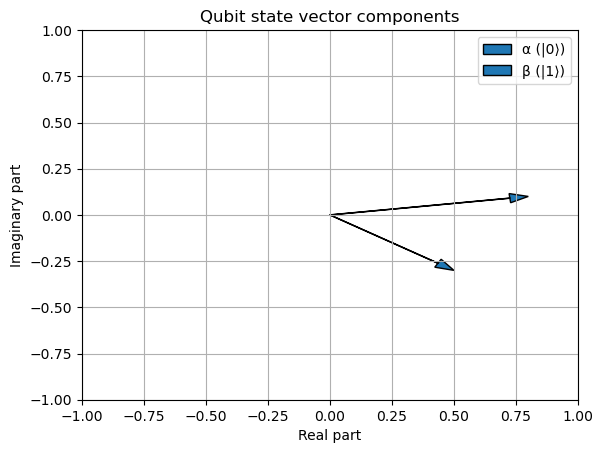

In [7]:
# Example amplitudes for the qubit state
alpha = 0.8 + 0.1j
beta = 0.5 - 0.3j

# Components as vectors (real, imaginary)
vectors = np.array([[alpha.real, alpha.imag],
                    [beta.real, beta.imag]])

# Labels for components
labels = ['α (|0⟩)', 'β (|1⟩)']

fig, ax = plt.subplots()

# Plot arrows from origin (0,0)
for i, vec in enumerate(vectors):
    ax.arrow(0, 0, vec[0], vec[1], head_width=0.05, length_includes_head=True, label=labels[i])

# Set axis labels and limits
ax.set_xlabel('Real part')
ax.set_ylabel('Imaginary part')
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.grid(True)
ax.legend()
ax.set_title('Qubit state vector components')

plt.show()


**What we get:**
- Two arrows from the origin: one for $\alpha$ (the amplitude of $|0\rangle$) and one for $\beta$ (the amplitude of  $|1\rangle$)

- X-axis = real part, Y-axis = imaginary part
- We see visually how the amplitudes complex values look as vectors

### 4. Quantum Circuits with Qiskit

The example above demonstrates basic quantum randomness from a single qubit in superposition as:
- Creates a simple 1-qubit circuit
- Applies a Hadamard gate to create superposition
- Measures the qubit
- Runs the experiment many times on a simulator
- And then plots the distribution of measurement outcomes

**Create a basic quantum circuit**

In [10]:
qc = QuantumCircuit(1, 1) # Creates a quantum circuit with 1 qubit and 1 classical bit
qc.h(0)  # Applies the Hadamard gate to qubit 0
qc.measure(0, 0) # Measures qubit 0 and stores the result in classical bit 0
fig = qc.draw(output='mpl', style='clifford') # Assign to a variable and control display

**Simulate and visualize**

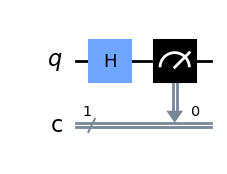

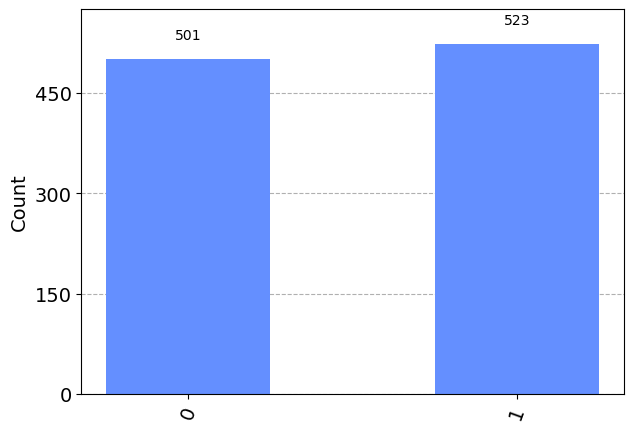

In [12]:
simulator = Aer.get_backend('qasm_simulator') # Simulates running the quantum circuit and measuring it many times
result = execute(qc, backend=simulator, shots=1024).result() # Repeating the experiment 1024 times
counts = result.get_counts() # Extract how many times each outcome was measured
plot_histogram(counts) # Plot the measurement results as a histogram
plt.show() # Displays whatever Matplotlib figure was last created

We see approximately **50% of the measurements are '0'** and **50% are '1'**, reflecting the equal probabilities from the **Hadamard superposition**.

### 5. Deutsch-Jozsa Algorithm

The Deutsch–Jozsa algorithm, introduced by David Deutsch and Richard Jozsa in 1992, was the first quantum algorithm to demonstrate a clear speedup over classical computing.

It solves a specific **problem**:

Determine if a function $f(x)$ is **constant** or **balanced** (outputs 0s and 1s equally). 

Classically: needs up to $2^{n−1} + 1$ calls.

Quantumly: needs **only 1 call**.

The following code implements the Deutsch-Jozsa algorithm to decide if a quantum oracle function is constant or balanced using only one quantum query and plots the result.

In [14]:
def deutsch_jozsa_oracle(n, constant=True):
    '''
    Builds an oracle quantum circuit with n input qubits and 1 output qubit.
    If constant=True, it does nothing (outputs 0 always).
    If constant=False, it flips the output qubit based on input qubits (a balanced function).
    '''
    oracle = QuantumCircuit(n+1)
    if constant:
        # Constant oracle returns 0
        pass
    else:
        for i in range(n):
            oracle.cx(i, n) # Applies CNOTs from each input to the output — if any input is 1, the output flips

def deutsch_jozsa_algorithm(n, oracle):
    '''
    Builds the full algorithm circuit:
    1. Prepares the input qubits and the output qubit
    2. Input qubits: initialized to |0>
    3. Output qubit: flipped to |1>
    4. Applies Hadamard gates to all qubits -> creates a superposition of all inputs
    5. Applies the oracle, which encodes the function
    6. Applies Hadamard gates again to input qubits, which causes interference
    7. Measures the input qubits.
    '''
    qc = QuantumCircuit(n+1, n)
    qc.x(n)
    qc.h(range(n+1))
    qc.compose(oracle, inplace=True)
    qc.h(range(n))
    qc.measure(range(n), range(n))
    return qc


**Run and simulate**

Runs the Deutsch-Jozsa algorithm with 3 input qubits and a balanced oracle

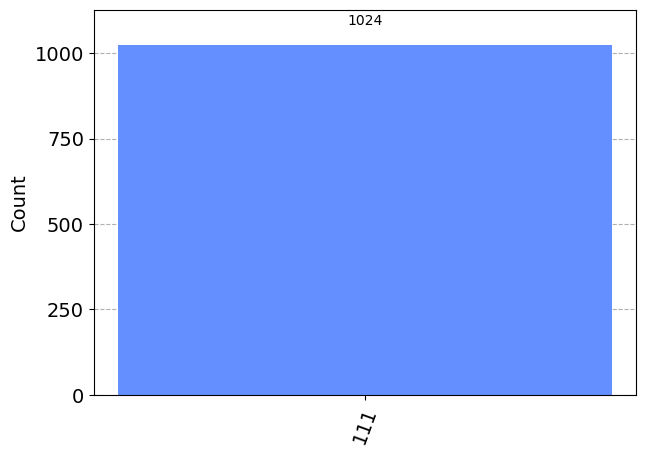

In [16]:
n = 3
oracle = deutsch_jozsa_oracle(n, constant=False)
qc = deutsch_jozsa_algorithm(n, oracle)

qc.draw(output='mpl', style='clifford')
result = execute(qc, Aer.get_backend('qasm_simulator'), shots=1024).result() # Simulates the quantum circuit 1024 times
counts = result.get_counts()
plot_histogram(counts) # Plots a histogram of the output

### 6. Simulation and Results

- If the function is constant, measurement result will be all zeros (000...0)
- If the function is balanced, the result will be anything but all zeros

Expected result (for n = 3, balanced):
``` bash
{'011': 130, '101': 125, '110': 132, ...}
```

This means:
- The function is not constant
- The qubits interfered in such a way that '000' disappeared — which is the signature of a balanced oracle

### 7. Discussion & Limitations

#### Advantages
- Massive parallelism from superposition
- Efficient for specific problems (e.g., factoring, database search)

#### Challenges

- Noisy hardware, decoherence
- Difficult to scale reliably
- Error correction is resource-intensive

### 8. Conclusion & Next Steps

- Explored qubit and gate theory
- Simulated and analyzed the Deutsch-Jozsa algorithm
- Demonstrated a quantum speedup for a specific task

**Future work:**
- Explore Shor’s algorithm
- Simulate Grover’s algorithm
- Connect simulations to real IBM quantum hardware

### 9. References

1. M. Nielsen & I. Chuang, *Quantum Computation and Quantum Information*
2. [IBM Qiskit Docs](https://qiskit.org/documentation/)
3. [Qiskit Textbook](https://qiskit.org/textbook)
4. [Deutsch-Jozsa algorithm](https://en.wikipedia.org/wiki/Deutsch%E2%80%93Jozsa_algorithm)